In [2]:
import json
import itertools
from rdkit import Chem
from rdkit.Chem import Descriptors

In [3]:
tacogfn_res = json.load(open('../misc/evaluations/A_0_100_crossdocked-mo-256-pocket-graph-1_evaluated.json'))
# tacogfn_res = json.load(open('../misc/evaluations/B_0_100_new-zinc-mo-256-128-39000-1_evaluated.json'))
tacogfn_smiles = itertools.chain.from_iterable([x['smiles'] for x in tacogfn_res.values()])

In [4]:
decompdiff_res = json.load(open('../misc/evaluations/decompdiff_beta_evaluated.json'))
decompdiff_smiles = itertools.chain.from_iterable([x['smiles'] for x in decompdiff_res.values()])

In [5]:
pocket2mol_res = json.load(open('../misc/evaluations/pocket2mol_agg_data_evaluated.json'))
pocket2mol_smiles = itertools.chain.from_iterable([x['smiles'] for x in pocket2mol_res.values()])

In [6]:
targetdiff_res = json.load(open('../misc/evaluations/targetdiff_agg_data_evaluated.json'))
targetdiff_smiles = itertools.chain.from_iterable([x['smiles'] for x in targetdiff_res.values()])

In [7]:
def get_wt_from_smiles(smiles):
    mols = [Chem.MolFromSmiles(x) for x in smiles]

    molwts = [Descriptors.MolWt(x) for x in mols]
    numatoms = [x.GetNumAtoms() for x in mols]

    return molwts, numatoms

In [8]:
tacogfn_molwts, tacogfn_numatoms = get_wt_from_smiles(tacogfn_smiles)
decompdiff_molwts, decompdiff_numatoms = get_wt_from_smiles(decompdiff_smiles)
pocket2mol_molwts, pocket2mol_numatoms = get_wt_from_smiles(pocket2mol_smiles)
targetdiff_molwts, targetdiff_numatoms = get_wt_from_smiles(targetdiff_smiles)

In [19]:
def get_pct_below(molwts, threshold=500):
    return len([x for x in molwts if x < threshold]) / len(molwts)

In [25]:
def get_pct_within(molwts, thresholds=[160, 480]):
    return len([x for x in molwts if thresholds[0] <= x and x <= thresholds[1]]) / len(molwts)

In [29]:
get_pct_below(tacogfn_molwts), get_pct_within(tacogfn_molwts)

(0.9995, 0.9976)

In [30]:
get_pct_below(decompdiff_molwts), get_pct_within(decompdiff_molwts)

(0.6282206729311912, 0.5118217641709609)

In [31]:
get_pct_below(pocket2mol_molwts), get_pct_within(pocket2mol_molwts)

(0.9521384928716904, 0.645519348268839)

In [28]:
get_pct_below(targetdiff_molwts), get_pct_within(targetdiff_molwts)

(0.9315644002211166, 0.7837479270315091)

In [9]:
import os
import sys
sys.path.append('..')

import torch

from src.tacogfn.utils.molecules import sdf_to_single_smiles
splits = torch.load('../dataset/split_by_name.pt')

/home/tsa87/anaconda3/envs/tacogfn/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
pdbbind_sdfs = [x[1] for x in splits['test']] + [x[1] for x in splits['train']]
pdbbind_sdfs = [os.path.join('../dataset/crossdocked_pocket10', x) for x in pdbbind_sdfs]
pdbbind_smiles = [sdf_to_single_smiles(x) for x in pdbbind_sdfs]

[22:01:07] ERROR: CTAB version string invalid at line 4
[22:01:07] ERROR: moving to the beginning of the next molecule
[22:01:12] ERROR: CTAB version string invalid at line 4
[22:01:12] ERROR: moving to the beginning of the next molecule


In [11]:
pdbbind_smiles = [x for x in pdbbind_smiles if x is not None]

In [12]:
pdb_molwts, pdb_numatoms = get_wt_from_smiles(pdbbind_smiles)

In [13]:
# plot overlapping molecular weights density

import numpy as np
import matplotlib.pyplot as plt

def plot_histogram(data1, data2, name1, name2):
    plt.hist(data1, bins=100, alpha=0.5, label=name1, density=True)
    plt.hist(data2, bins=100, alpha=0.5, label=name2, density=True)

    # print the mean and std for each dataset
    print(f'{name1} mean:', np.mean(data1), 'std:', np.std(data1)) 
    print(f'{name2} mean:', np.mean(data2), 'std:', np.std(data2)) 

    plt.legend(loc='upper right')
    plt.show()

tacogfn mean: 402.8631127000001 std: 22.73456700082059
decompdiff mean: 479.3914030009096 std: 102.88635399845944


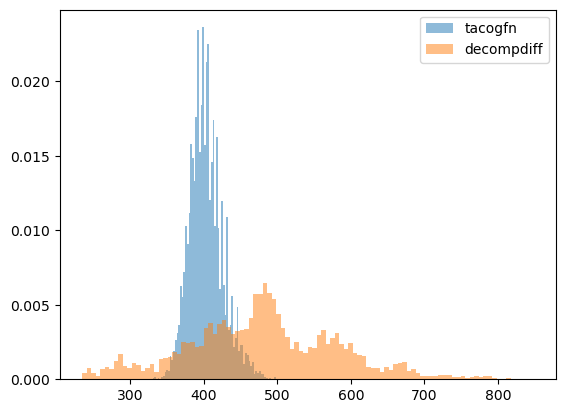

In [14]:
plot_histogram(tacogfn_molwts, decompdiff_molwts, 'tacogfn', 'decompdiff')

tacogfn mean: 402.8631127000001 std: 22.73456700082059
pdbbind mean: 339.6550910607605 std: 126.78217633035698


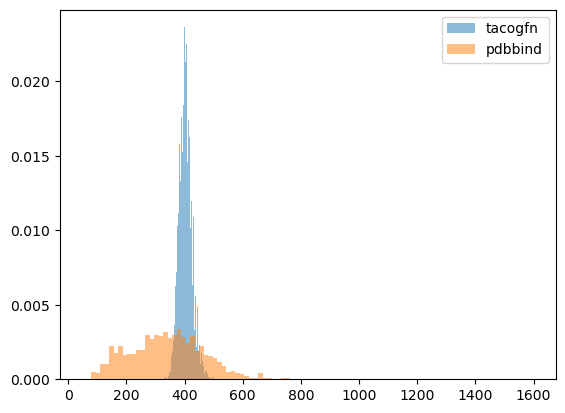

In [15]:
plot_histogram(tacogfn_molwts, pdb_molwts, 'tacogfn', 'pdbbind')

data1 mean: 30.4679 std: 1.7023423833060138
data2 mean: 23.603148914064217 std: 8.790154344349894


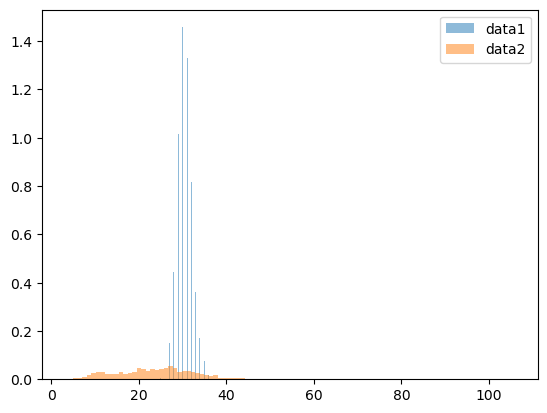

In [115]:
plot_histogram(tacogfn_numatoms, pdb_numatoms)

data1 mean: 402.8631127000001 std: 22.73456700082059
data2 mean: 322.121371254837 std: 127.93687407850078


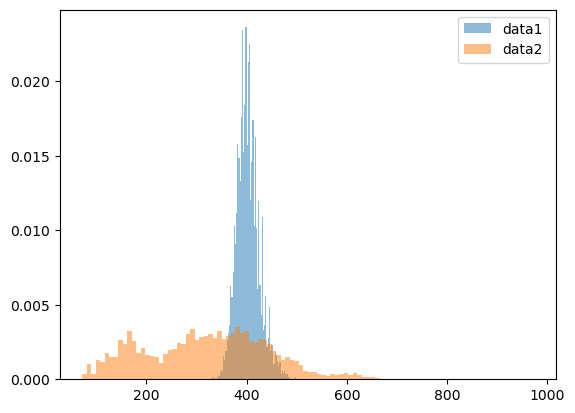

In [113]:
plot_histogram(tacogfn_molwts, targetdiff_molwts)

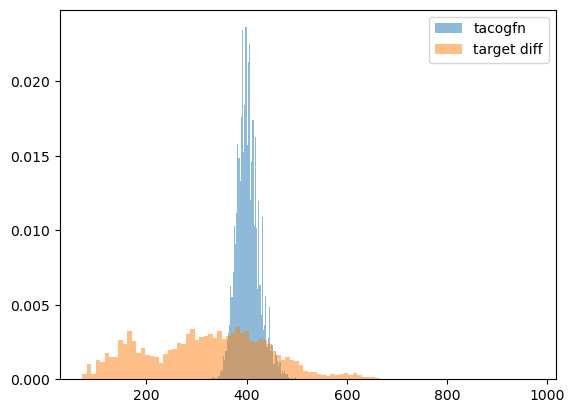

In [102]:
import matplotlib.pyplot as plt

plt.hist(tacogfn_molwts, bins=100, alpha=0.5, label='tacogfn', density=True)
plt.hist(targetdiff_molwts, bins=100, alpha=0.5, label='target diff', density=True)
plt.legend(loc='upper right')
plt.show()

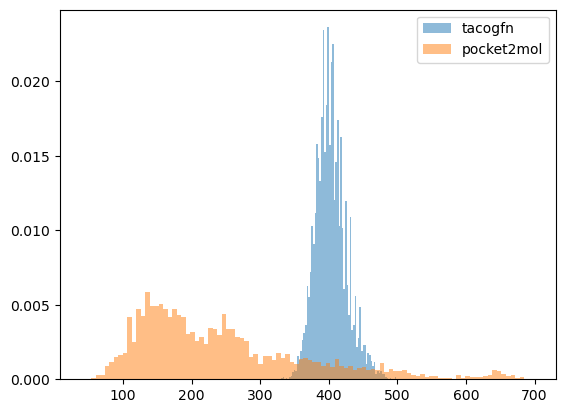

In [83]:
import matplotlib.pyplot as plt

plt.hist(tacogfn_molwts, bins=100, alpha=0.5, label='tacogfn', density=True)
plt.hist(pocket2mol_molwts, bins=100, alpha=0.5, label='pocket2mol', density=True)
plt.legend(loc='upper right')
plt.show()